For project milestone 2, I decided to investigate another way of training a multi-label classifier for our group project which uses a movie genre multi-label dataset. So far, in our group project we have used a one-vs-rest sklearn logistic regression classifier which looks at training a classifier to our 5 one-hot-encoded movie genre y-label columns. In the code below, I explore creating a powerlabel column to train our multilabel logistic regression classibier instead. My goal is to compare the multilabel classification results of the two approaches to see how the results might differ.    

In [13]:
import numpy as np

In [14]:
import pandas as pd

Import and read y_train resampled and X_train resampled dataframes below:

In [15]:
y_train_resampled= pd.read_csv('/content/y_train_resampled.csv')

In [16]:
X_train_resampled= pd.read_csv('/content/X_train_resampled.csv')

In [17]:
y_train_resampled.head()

,Action,Comedy,Drama,Thriller,Romance
0,0,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,1,0,1
4,0,1,1,0,0


In [18]:
y_train_resampled.shape

(32451, 5)

Note that X_train_resampled as seen below has 500 columns that have been vectorized using Word2Vec in the past group coding submission:

In [20]:
X_train_resampled.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.161566,0.183278,0.220968,0.164568,-0.092740,-0.248178,0.055733,0.436052,0.159830,0.051097,...,0.021814,-0.102782,0.246120,0.010437,0.112460,-0.000834,-0.149785,-0.206252,-0.264727,-0.041328
1,0.212007,0.254485,0.151174,0.080505,-0.162912,-0.244677,0.084626,0.471016,0.200687,0.011735,...,-0.010076,-0.076902,0.262536,0.052543,0.087333,-0.028151,-0.127065,-0.226374,-0.265628,-0.049100
2,0.166367,0.196648,0.130541,0.079626,-0.127395,-0.198345,0.066581,0.381767,0.156165,0.015307,...,-0.004892,-0.068012,0.208585,0.040472,0.073164,-0.016825,-0.103091,-0.181543,-0.216487,-0.036993
3,0.183163,0.207643,0.154323,0.109941,-0.137106,-0.229943,0.067295,0.437342,0.164551,0.021391,...,-0.002477,-0.085084,0.233429,0.043714,0.083811,-0.012736,-0.110586,-0.192560,-0.238258,-0.037847
4,0.163751,0.198171,0.125116,0.074686,-0.131483,-0.199749,0.066815,0.381943,0.153047,0.013098,...,-0.003264,-0.062453,0.208487,0.041729,0.073868,-0.020332,-0.101746,-0.179224,-0.214805,-0.033734


In [21]:
X_train_resampled.shape

(32451, 500)

In [22]:
import sklearn

In [23]:
from sklearn.datasets import make_multilabel_classification
!pip install scikit-multilearn
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 4.0 MB/s eta 0:00:00


In [24]:
#initialize the base classifier:
base_classifier = LogisticRegression(max_iter=1000)


In [25]:
#Create Powerset instance using the base classifier
classifier = LabelPowerset(classifier=base_classifier, require_dense=[False, False])


In [26]:
#Show the powerlabels in a dataframe:
def binary_to_power_label(row):
    power_label = 0
    for i, value in enumerate(reversed(row)):
        power_label += 2**i * value
    return power_label

y_train_powerlabel = y_train_resampled.apply(binary_to_power_label, axis=1)
y_train_powerlabel = pd.DataFrame(y_train_powerlabel, columns=["powerlabel"])
y_train_powerlabel.head(30)

,powerlabel
0,0
1,4
2,2
3,5
4,12
5,4
6,24
7,6
8,4
9,5


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Train the classifier using the resampled training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Convert the predicted labels to a DataFrame
y_pred_df = pd.DataFrame(y_pred.toarray(), columns=y_test.columns)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_df)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print the classification report
report = classification_report(y_test, y_pred_df, zero_division=0)
print("Classification Report:\n", report)




Accuracy: 0.18
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.74      0.68      3145
           1       0.64      0.63      0.63      3204
           2       0.59      0.40      0.48      3202
           3       0.60      0.57      0.58      2931
           4       0.59      0.72      0.65      2865

   micro avg       0.61      0.61      0.61     15347
   macro avg       0.61      0.61      0.61     15347
weighted avg       0.61      0.61      0.60     15347
 samples avg       0.58      0.59      0.55     15347



Note that accuracy: 0.18 as seen in the classification report above, means that in 18% of the instances, the classifier correctly predicted all of the genre labels for a given instance. Next, let's look at some genre-specific confusion matrixes below: 

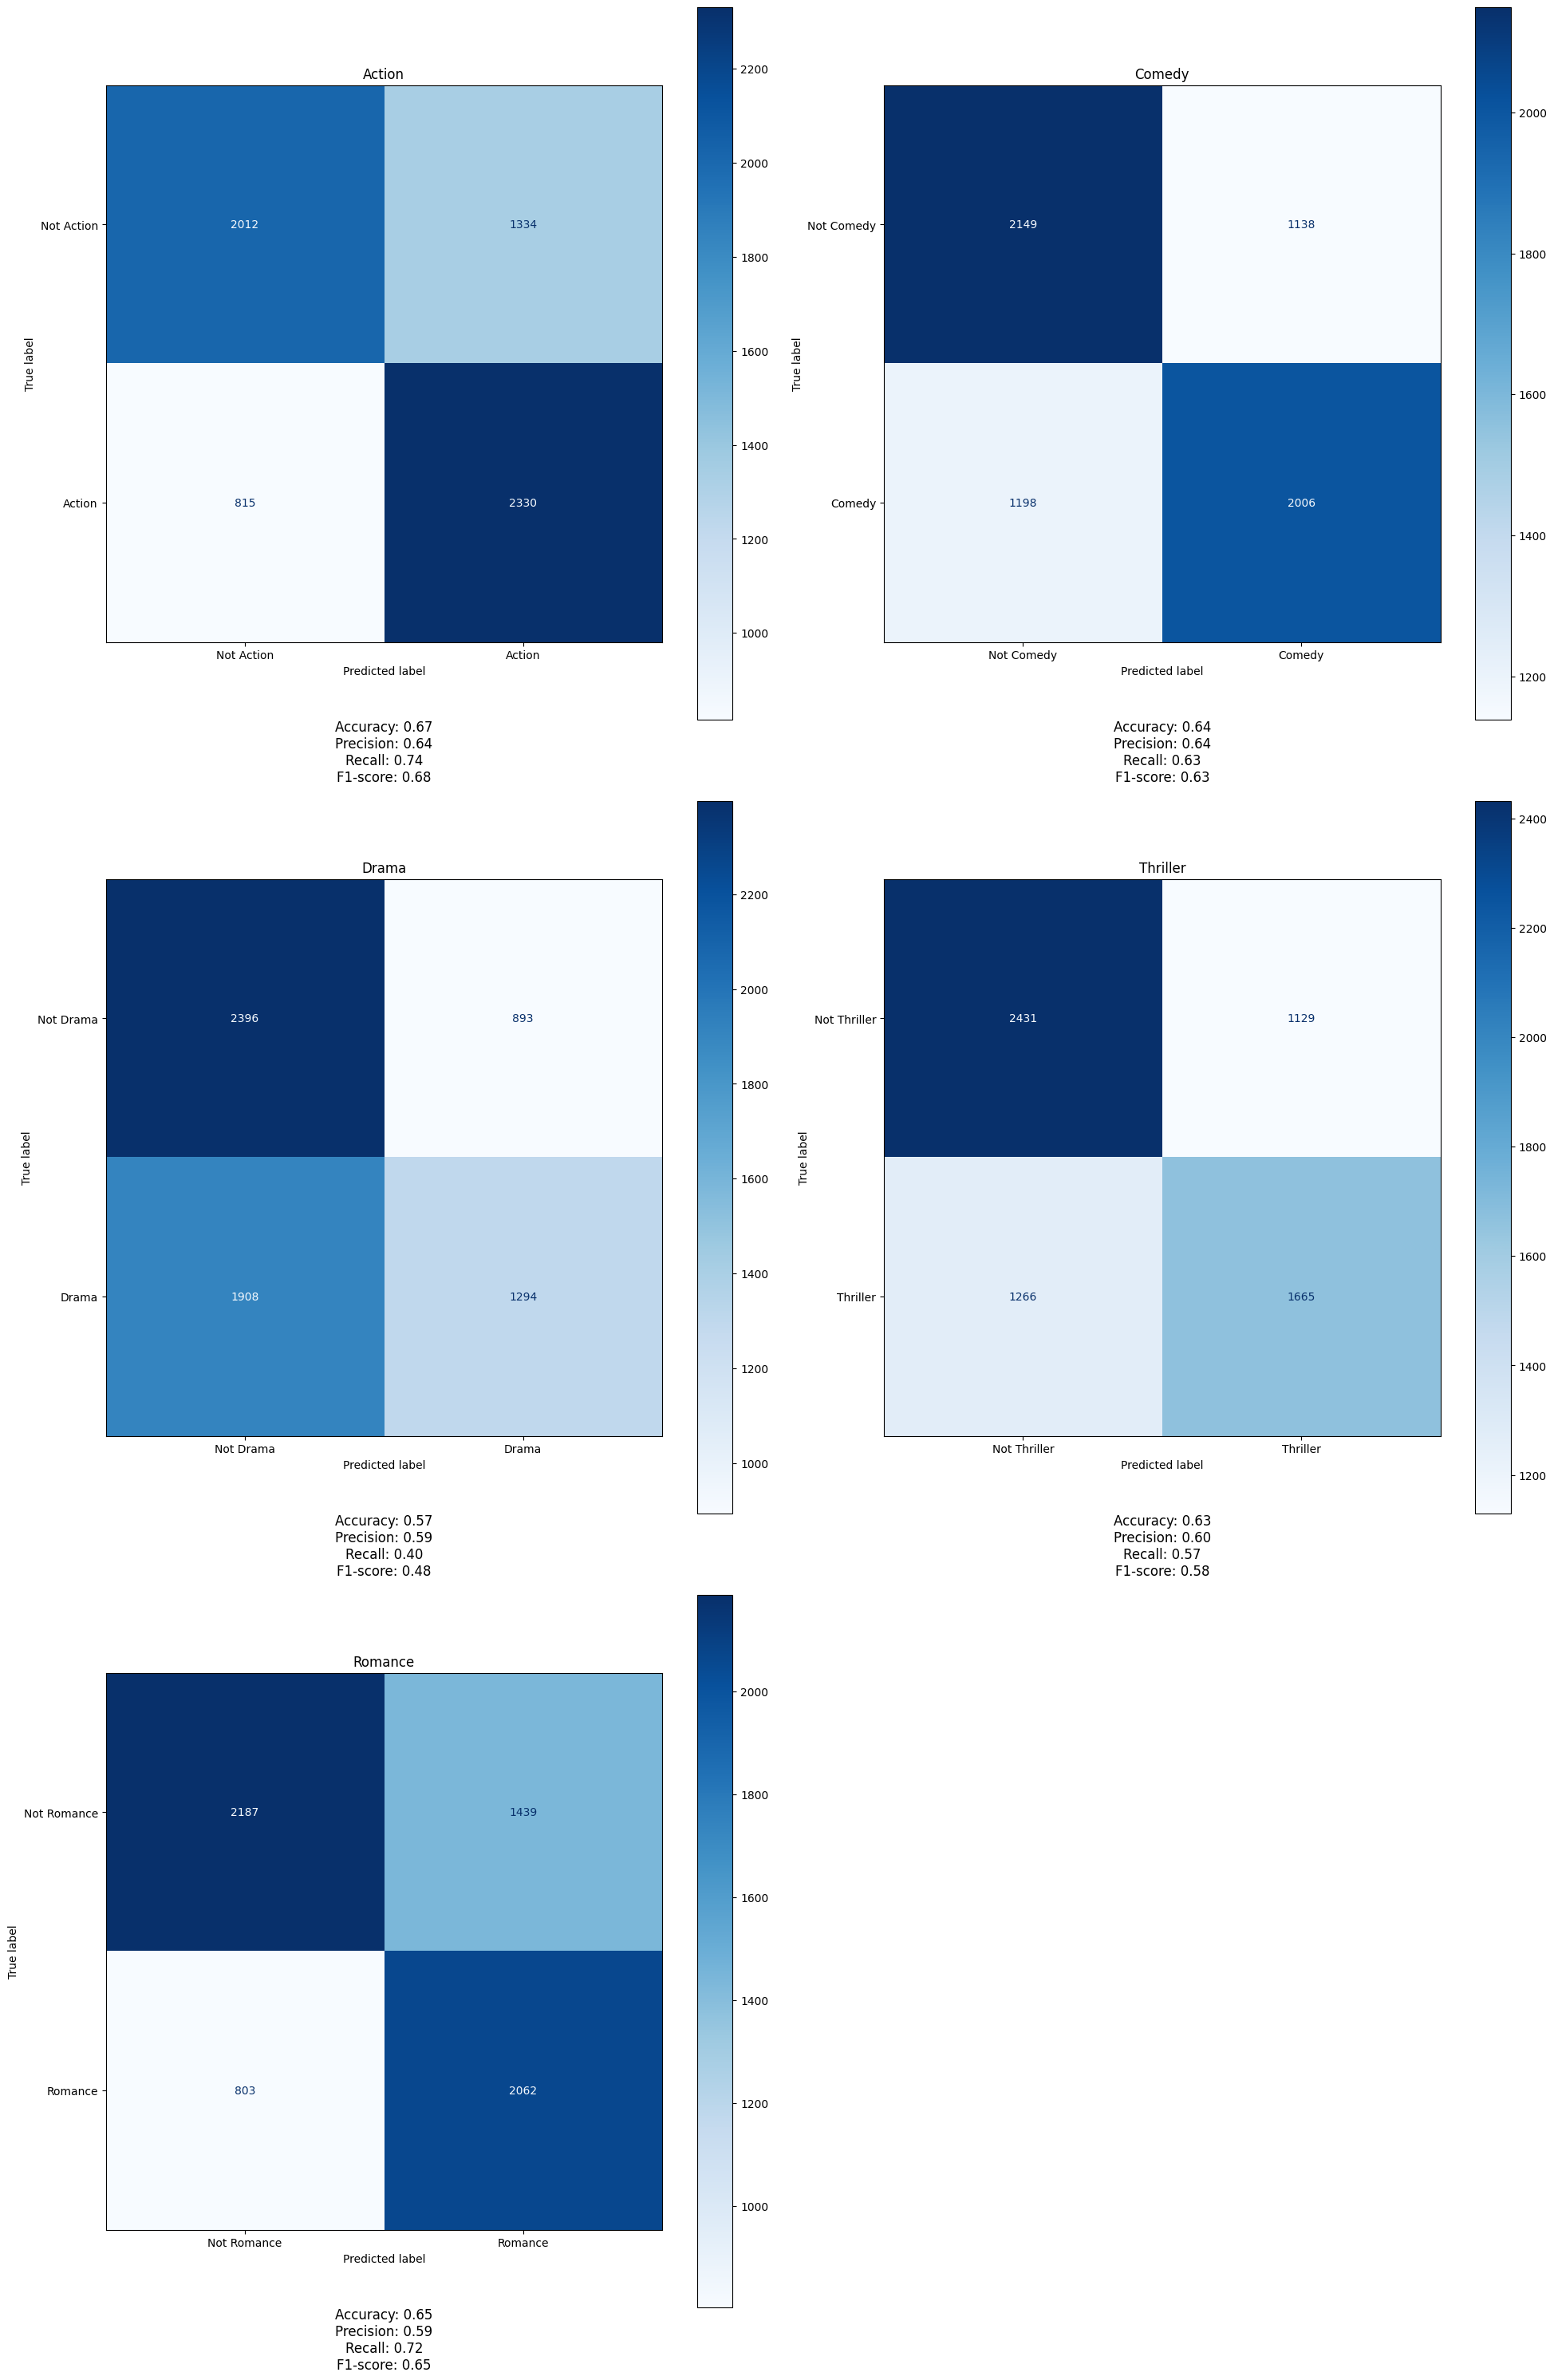

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, accuracy_score

n_classes = y_test.shape[1]

fig, axes = plt.subplots(nrows=int(np.ceil(n_classes / 2)), ncols=2, figsize=(20, n_classes * 6))
axes = axes.flatten()

for i, genre in enumerate(y_test.columns):
    cm = confusion_matrix(y_test[genre], y_pred_df[genre])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {genre}', genre])
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, xticks_rotation='horizontal')

    # Calculate metrics for the current genre
    precision, recall, f1, _ = precision_recall_fscore_support(y_test[genre], y_pred_df[genre], average='binary', zero_division=0)
    accuracy = accuracy_score(y_test[genre], y_pred_df[genre])

    # Add metrics to the title
    axes[i].set_title(f"{genre}")

    # Add metrics below the confusion matrix
    metrics_text = f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}"
    axes[i].annotate(metrics_text, xy=(0.5, -0.25), xycoords='axes fraction', ha='center', fontsize=12)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()






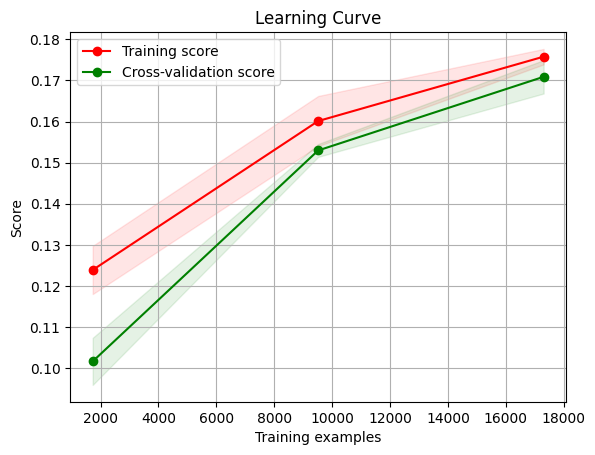

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X_train, y_train, X_test, y_test, title='Learning Curve', ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 3)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy', shuffle=True)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

base_classifier = LogisticRegression(max_iter=1000)
classifier = LabelPowerset(classifier=base_classifier, require_dense=[False, False])

plot_learning_curve(classifier, X_train, y_train, X_test, y_test, title='Learning Curve', cv=3)
plt.show()



Lastly, the learning curves above show minimal overfitting from model training and cross-validation sets. Both curves are within about 0.5 accuracy score when using greater than 10,000 training examples. 

Next, Let's work on feature selection below to see if selecting higher signal features can further eliminate noise in the model which will hopefully improve some of the scores of the model's evaluation metrics. 

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

# Define the model
model = RandomForestRegressor()

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Adjust the list of values as needed
    'max_depth': [None, 10, 20, 30]      # Adjust the list of values as needed
}

# Define the grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=2, n_jobs=-1)  # cv is the number of cross-validation folds, adjust as needed

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Get importance
importance = best_model.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: ignored